# Artificial convolutions

In this example we are going to show results from artificial convolutions in which the target ground truth exists and to see the effect of the deconvolution.

The first thing will be to load the necessry packages to make the distributions and plots.

In [1]:
using Distributions
using Random
using Plots

Then, we load the `scBayesdeconv` distribution package.

In [2]:
using scBayesDeconv

# Distribution where the noise produces an artifact and a shift

In this example we produce a noise that is clearly bimodal and some non-zero displacement. This noise, when convolved to any distribution will produce additional peacks and a shift in the original distribution.

First, we create the artificial distributions of the noise and the target using the package `Distributions.jl`.

In [3]:
# target distribution
ndist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([10],ones(1,1)),
        MultivariateNormal([50],ones(1,1))
    ],
    [.5,.5]
    )

# noise distribution
tdist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([0],ones(1,1))
    ],
    [1.]
    );

Then, we create random samples to generate the dataset.

In [ ]:
N = 1000

t = Matrix(transpose(rand(tdist,N)));
n = Matrix(transpose(rand(ndist,N)));
c = Matrix(transpose(rand(ndist,N)))+Matrix(transpose(rand(tdist,N)));
c = sort(c,dims=1);

Finally, we visualize the distributions. 

Notice that, in a real case, we will have only samples from the noise and the convolution.

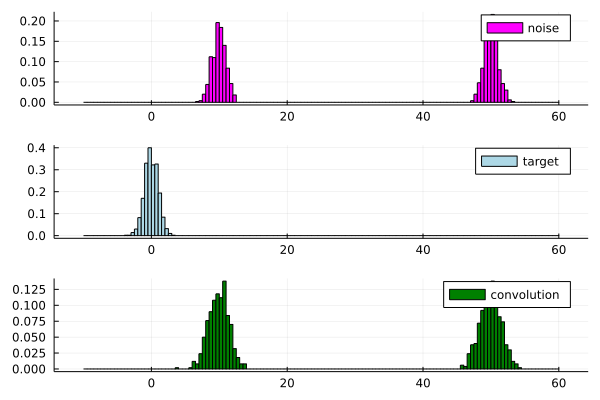

In [8]:
bins = range(-10,60,step=.5)

l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",color="magenta")

l2 = histogram(vec(t),normalize=true,bins=bins,label="target",color="lightblue")

l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",color="green")

plot(l1,l2,l3,layout=(3,1))

## Fitting the data

For deconvolving the ditribution we proceed in two steps. The first step is to fit the noise to a Gaussian Mixture Model to have a model of the noise distribution.

For that we will use a infinite mixture and allow it to detect by itself the number of components needed to describe the data.

In [14]:
dn = infiniteGaussianMixture(n,k=2,Σ0 = ones(1,1),κ0=0.01);

Then, we will fit a infinite gaussian deconvolution model to the other data.

In [15]:
dt = infiniteGaussianMixtureDeconvolution(c,dn,k=1,Σ0=ones(1,1),κ0=0.01,ν0=0.01,α=1);

Finally, we can check the distribution results over the dataset.

The fitted models of `scBayesDeconvolution` are Bayesian model whose samples are in terms of ``Distributions.jl` distributions, so we can easily compute all the statistics that this package provides for distributions.

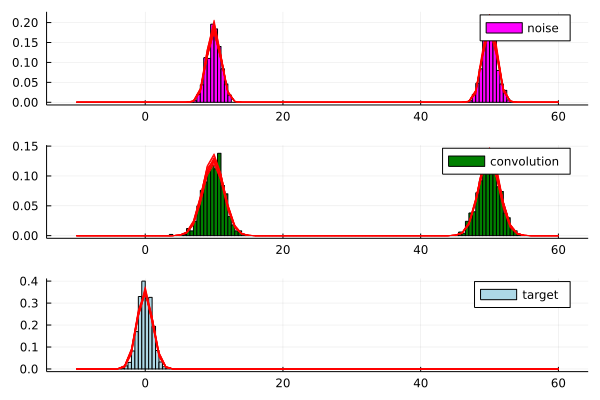

In [35]:
x = -10:60
bins = range(-10,60,step=.5)

#Ploting the noise distribution and the samples
l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",color="magenta")
for i in 1:10:100
    plot!(l1,x,pdf(scBayesDeconv.sample(dn),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end

#Ploting the noise distribution and the samples
l2 = histogram(vec(c),normalize=true,bins=bins,label="convolution",color="green")
for i in 2:10:100
    plot!(l2,x,pdf(scBayesDeconv.sample(dt,distribution=:Convolution),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end

#Ploting the noise distribution and the samples
l3 = histogram(vec(t),normalize=true,bins=bins,label="target",color="lightblue")
for i in 2:10:100
    plot!(l3,x,pdf(scBayesDeconv.sample(dt),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end

plot(l1,l2,l3,layout=(3,1))

# Distribution where the noise covers a bimodality

In here we show an example in which the noise covers the bimodal distribution.

The procedure is the same as in the other example but focusing in a different problem.

In [56]:
tdist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([0],ones(1,1)),
        MultivariateNormal([3],ones(1,1))
    ],
    [.5,.5]
    )

ndist = MixtureModel(
    MultivariateNormal[
        MultivariateNormal([0],ones(1,1))
    ],
    [1.]
    )

N = 10000

t = Matrix(transpose(rand(tdist,N)));
n = Matrix(transpose(rand(ndist,N)));
c = Matrix(transpose(rand(ndist,N)))+Matrix(transpose(rand(tdist,N)));
c = sort(c,dims=1);

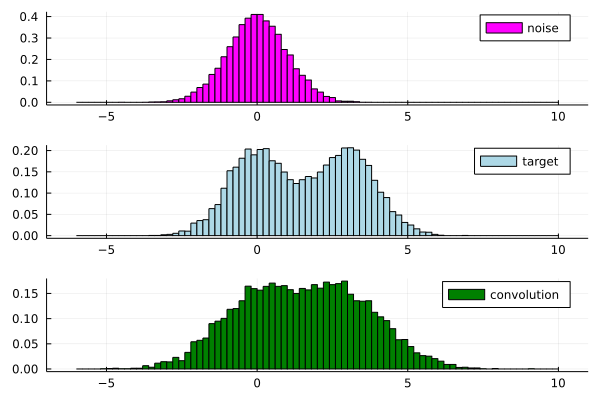

In [57]:
bins = range(-6,10,step=.2)

l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",color="magenta")

l2 = histogram(vec(t),normalize=true,bins=bins,label="target",color="lightblue")

l3 = histogram(vec(c),normalize=true,bins=bins,label="convolution",color="green")

plot(l1,l2,l3,layout=(3,1))

In [58]:
dn = infiniteGaussianMixture(n);

In [59]:
dt = infiniteGaussianMixtureDeconvolution(c,dn);

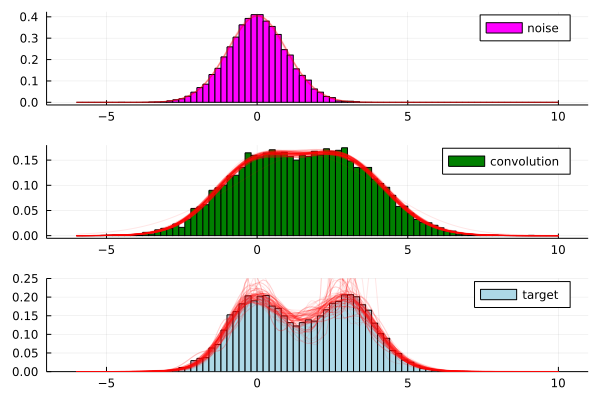

In [65]:
x = -6:.1:10
bins = range(-6,10,step=.2)

#Ploting the noise distribution and the samples
l1 = histogram(vec(n),normalize=true,bins=bins,label="noise",color="magenta")
for i in 1:10:100
    plot!(l1,x,pdf(scBayesDeconv.sample(dn),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end

#Ploting the noise distribution and the samples
l2 = histogram(vec(c),normalize=true,bins=bins,label="convolution",color="green")
for i in 2:1:100
    plot!(l2,x,pdf(scBayesDeconv.sample(dt,distribution=:Convolution),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end

#Ploting the noise distribution and the samples
l3 = histogram(vec(t),normalize=true,bins=bins,label="target",color="lightblue")
for i in 2:1:100
    plot!(l3,x,pdf(scBayesDeconv.sample(dt),reshape(x,1,length(x)))[:,1],color="red",label="",alpha=0.1)
end
ylims!(0,.25)

plot(l1,l2,l3,layout=(3,1))

# Distribution in several dimensions

The method can be applied to systems with any dimension.

In [81]:
tdist = MixtureModel([
    product_distribution([Gamma(3,2),Gamma(2,3)]),
    product_distribution([Gamma(5,1),Gamma(7,7)]),
    product_distribution([Gamma(10,1.5),Gamma(10,7)]),
]
)

ndist = MixtureModel(
    [
        product_distribution([Gamma(3,2),Gamma(2,3)])
    ],
    [1.]
    )

N = 10000
t = Matrix(transpose(rand(tdist,N)));
n = Matrix(transpose(rand(ndist,N)));
c = Matrix(transpose(rand(ndist,N))).+Matrix(transpose(rand(tdist,N)));

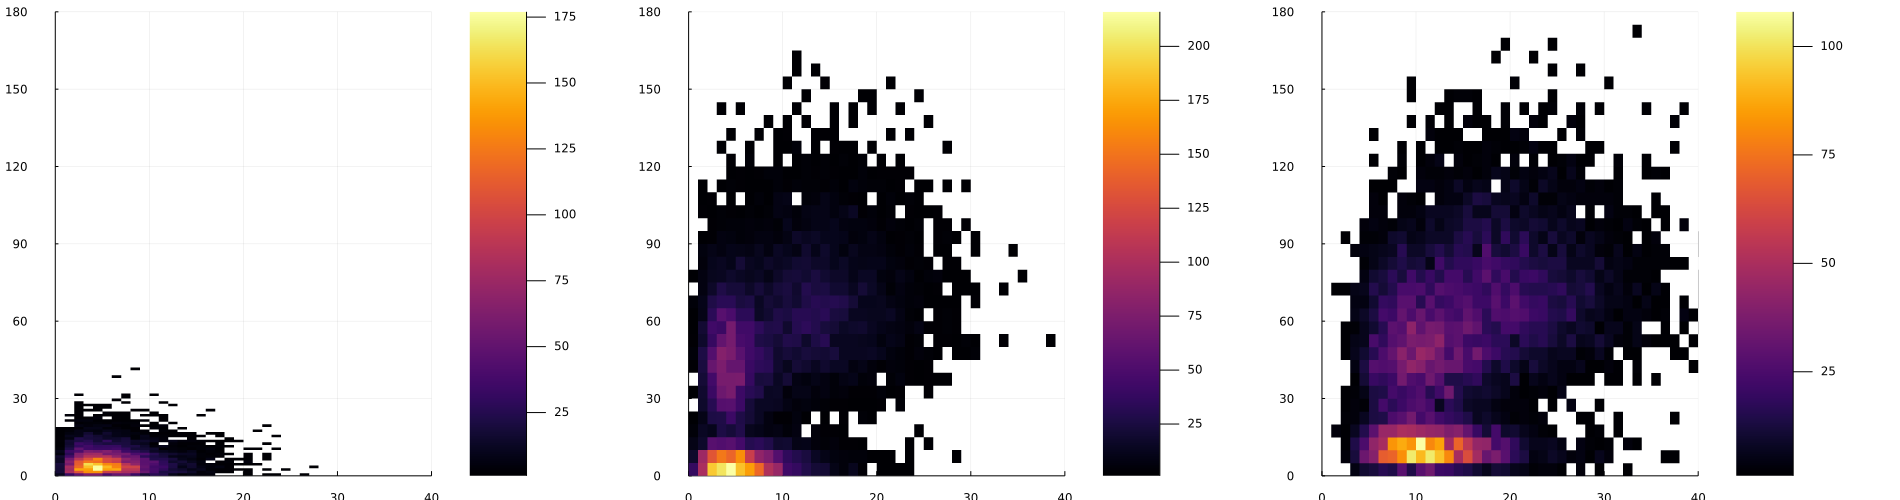

In [91]:
nShow=2000

l1 = histogram2d(n[:,1],n[:,2],bins=50,markersize=2,label="noise")
# scatter!(l1,n[1:nShow,1],n[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue")
xlims!(0,40)
ylims!(0,180)

l2 = histogram2d(t[:,1],t[:,2],bins=50,markersize=2,label="target")
# scatter!(l2,t[1:nShow,1],t[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue")
xlims!(0,40)
ylims!(0,180)

l3 = histogram2d(c[:,1],c[:,2],bins=50,markersize=2,label="convolution")
# scatter!(l3,c[1:nShow,1],c[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue")
xlims!(0,40)
ylims!(0,180)

plot(l1,l2,l3,layout=(1,3),size=[1900,500])

In [83]:
dn = infiniteGaussianMixture(n);

In [84]:
dt = infiniteGaussianMixtureDeconvolution(c,dn);

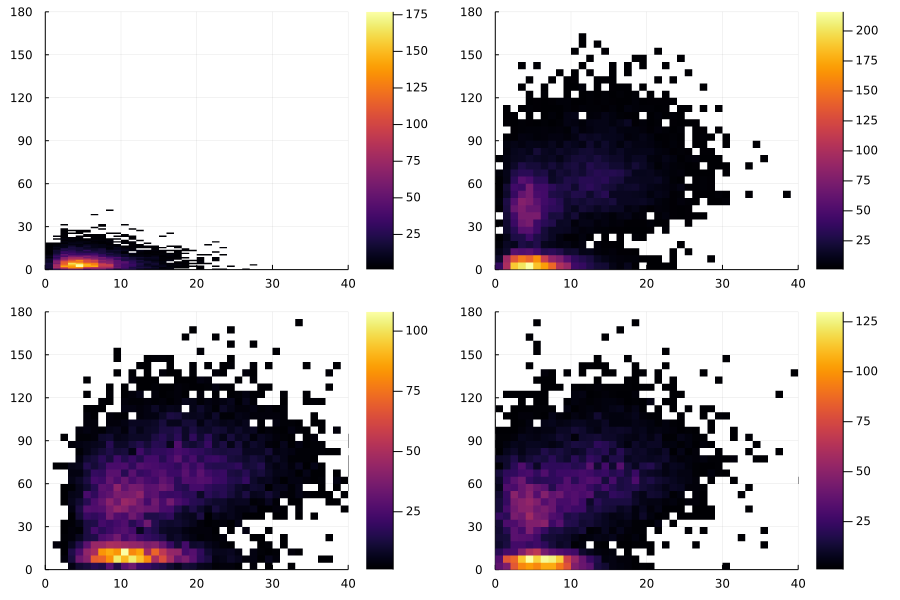

In [101]:
nShow = 1000

l1 = histogram2d(n[:,1],n[:,2],bins=50,markersize=2,label="noise")
# scatter!(l1,n[1:nShow,1],n[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue",title="Noise")
xlims!(0,40)
ylims!(0,180)

l2 = histogram2d(t[:,1],t[:,2],bins=50,markersize=2,label="target")
# scatter!(l2,t[1:nShow,1],t[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue",title="Target")
xlims!(0,40)
ylims!(0,180)

l3 = histogram2d(c[:,1],c[:,2],bins=50,markersize=2,label="convolution")
# scatter!(l3,c[1:nShow,1],c[1:nShow,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue",title="Convolution")
xlims!(0,40)
ylims!(0,180)

d = zeros(10000,2)
for i in 1:100
    aux = rand(dt.samples[i],100)
    d[(i-1)*100+1:i*100, 1] .= aux[1,:]
    d[(i-1)*100+1:i*100, 2] .= aux[2,:]
end
l4 = histogram2d(d[:,1],d[:,2],bins=100,markersize=2,label="convolution")
# scatter!(l4,d[1:10:10000,1],d[1:10:10000,2],markersize=1,markerstrokewidth=0,label="noise",color="lightblue",title="Deconvolution")
xlims!(0,40)
ylims!(0,180)

plot(l1,l2,l3,l4,layout=(2,2),size=[900,600])